<h1> Data Processing and Visualisation </h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataframes = {}
time_stamps = [0, 20, 40, 60, 80, 100, 120, 140, 160]

for time in time_stamps:
    path = f"ZIF_MOF_V1_T{time}.xlsx"
    dataframes[time] = pd.read_excel(path, skiprows=10)

In [6]:
from scipy.ndimage import gaussian_filter1d

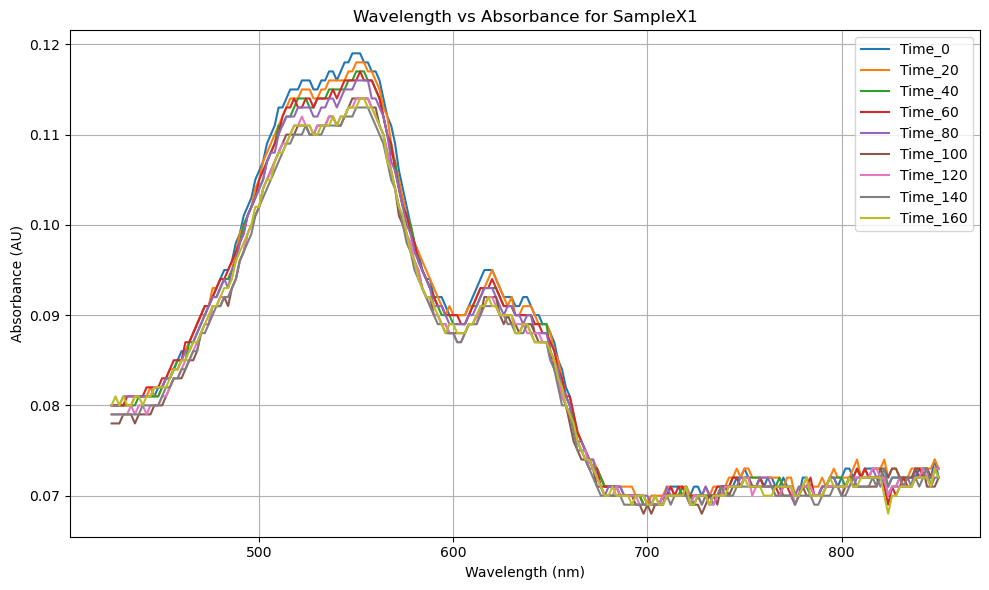

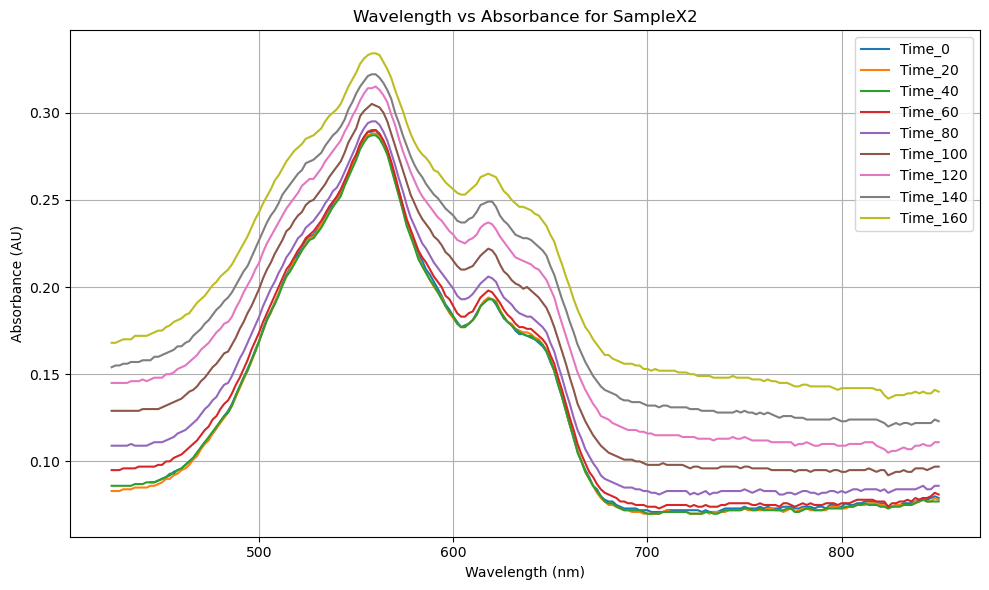

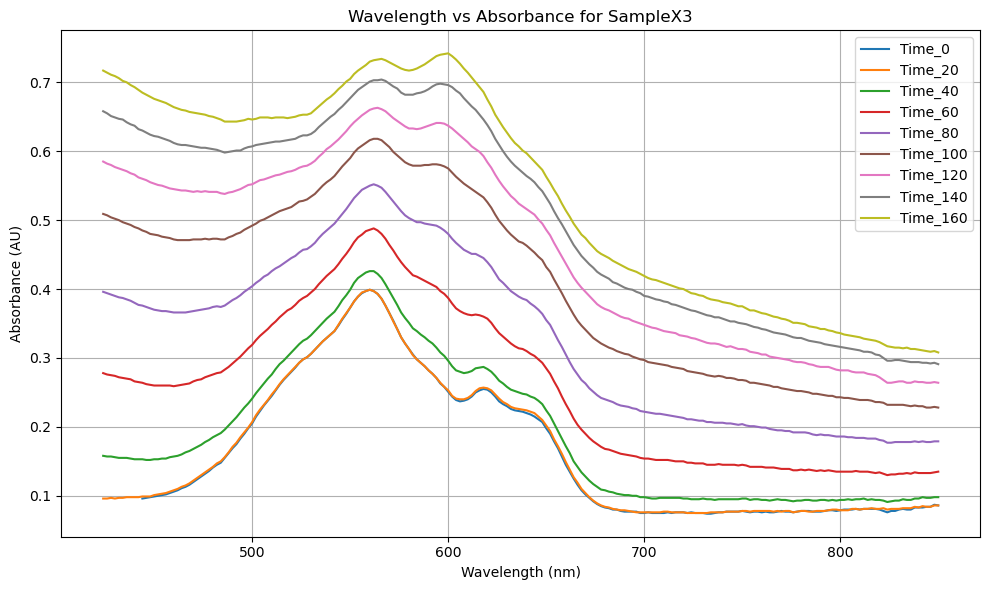

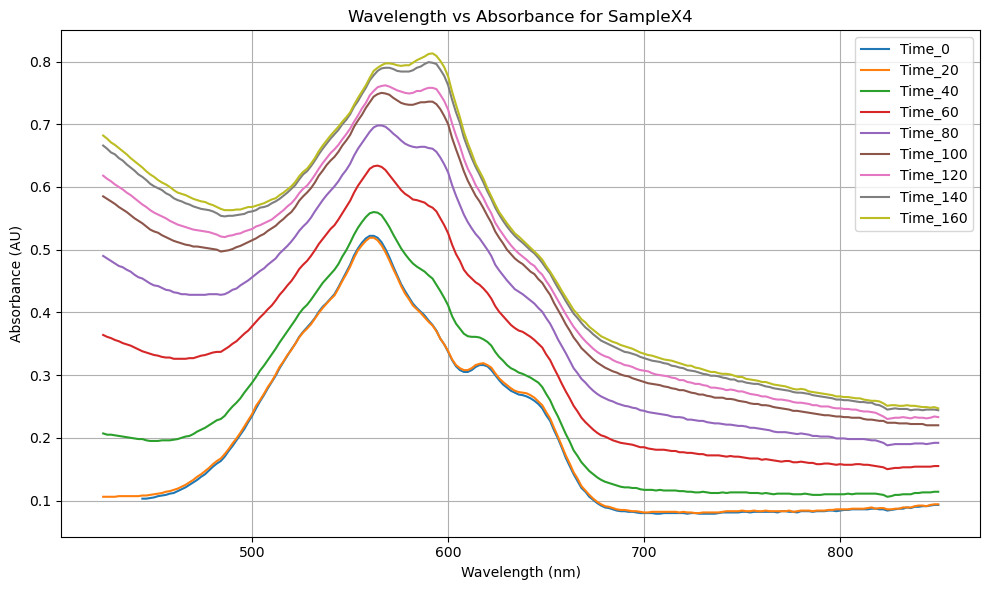

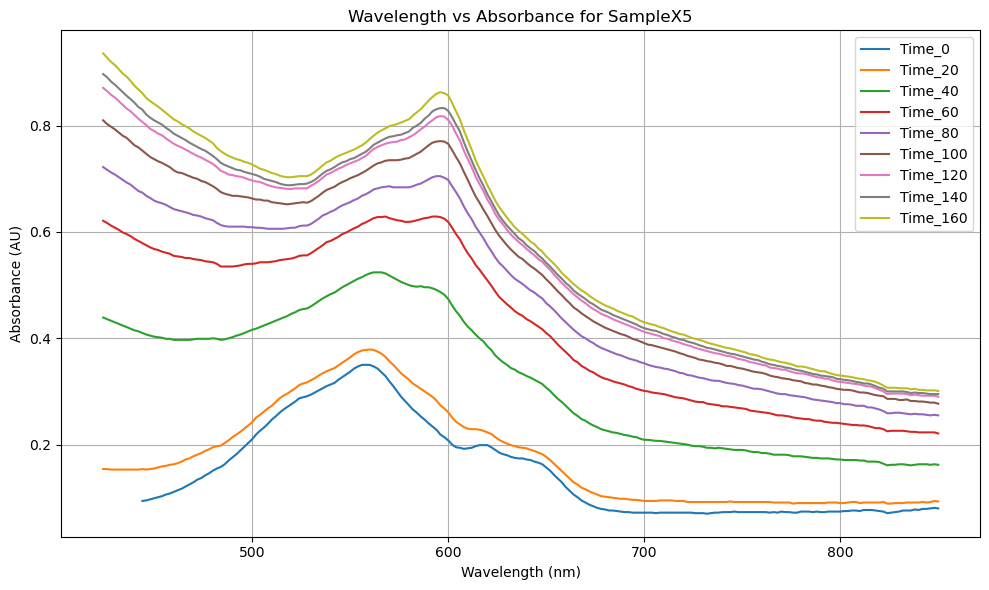

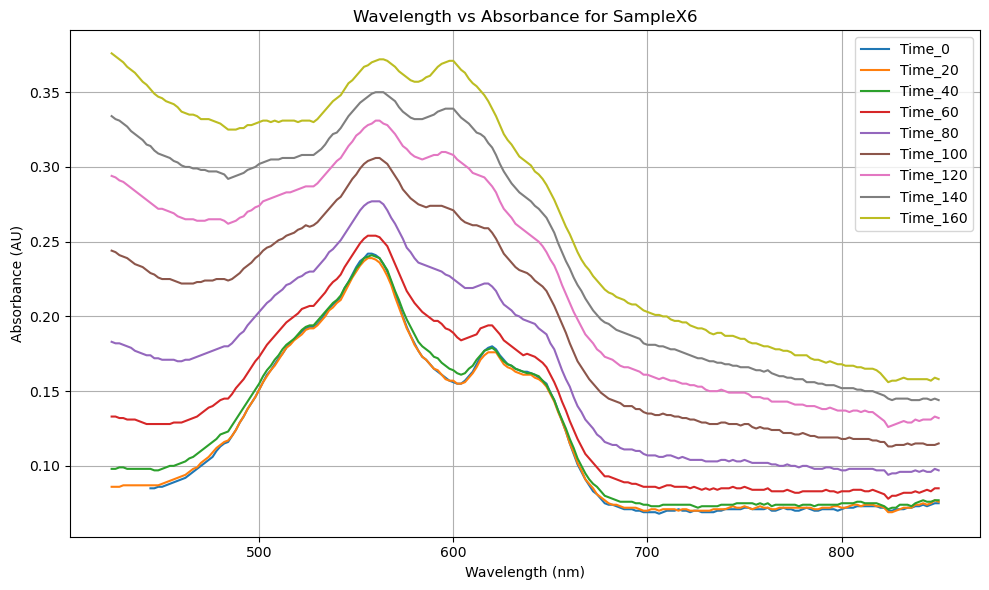

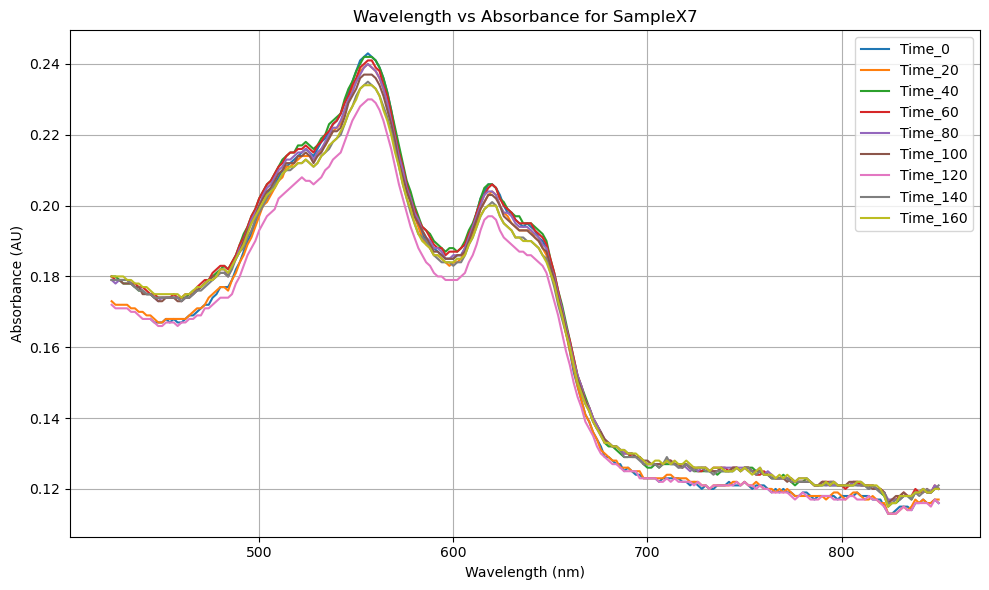

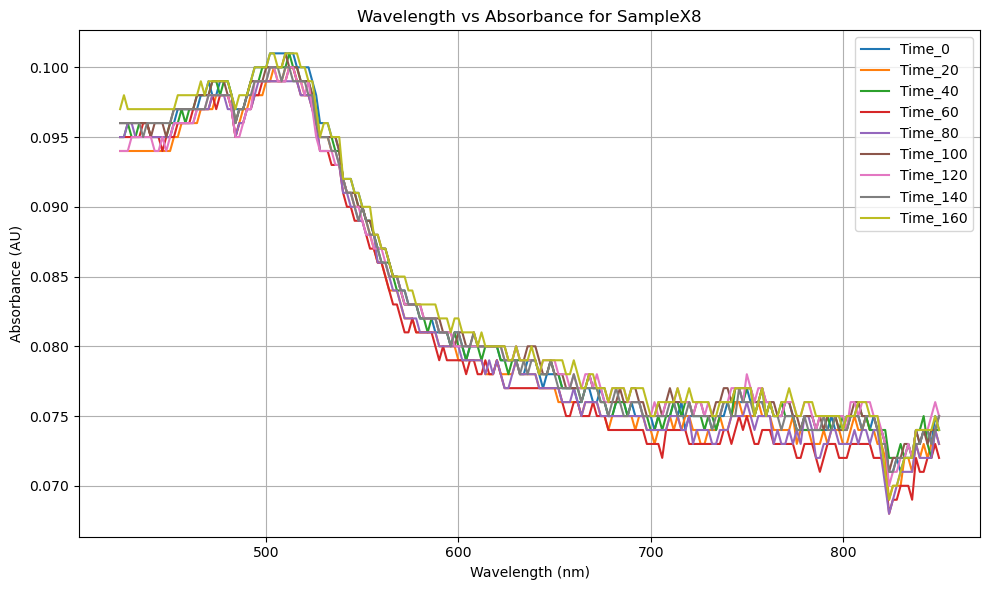

In [7]:
for i in range(8):
    plt.figure(figsize=(10, 6))
    for j in range(9):
        wavelengths = dataframes[j*20].iloc[0, 50:].values
        absorbance = dataframes[j*20].iloc[i+1, 50:].values
        # absorbance = absorbance.astype(float)
        # absorbance = gaussian_filter1d(absorbance, sigma=1)
        plt.plot(wavelengths, absorbance, label=f'Time_{j*20}')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance (AU)")
    plt.title(f"Wavelength vs Absorbance for SampleX{i+1}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

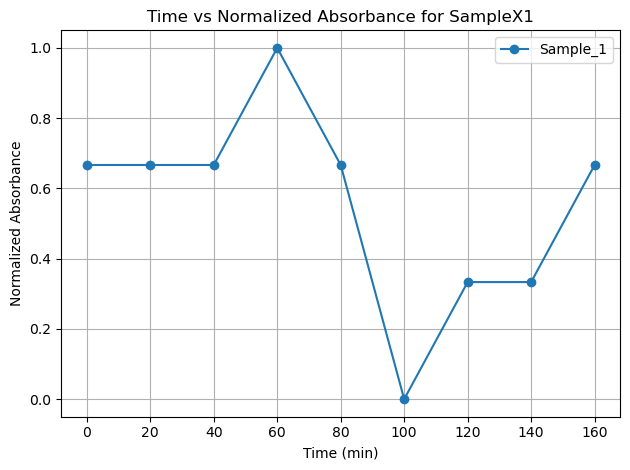

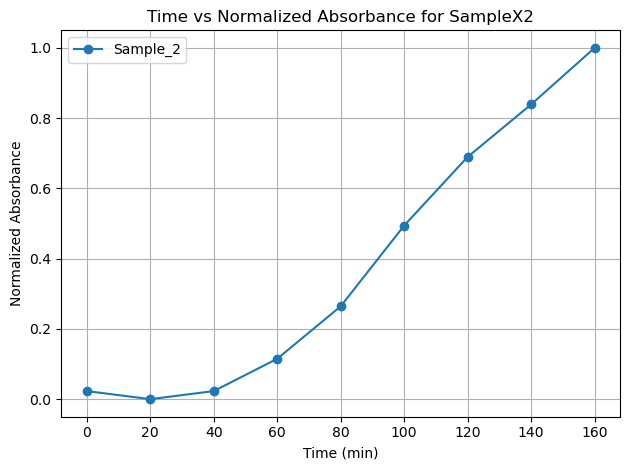

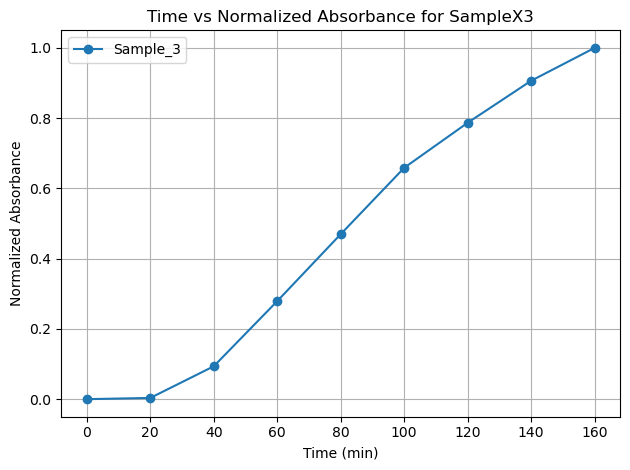

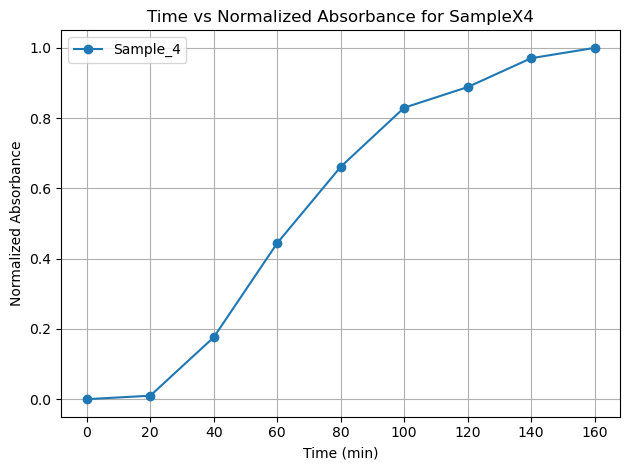

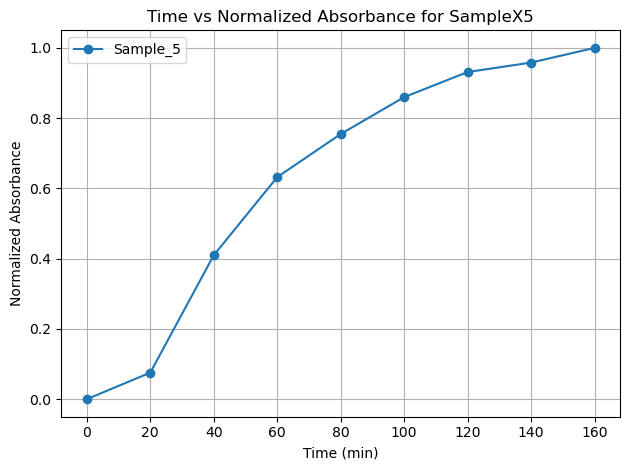

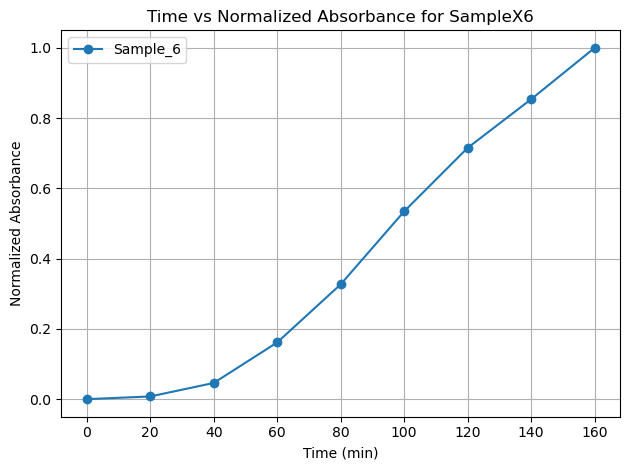

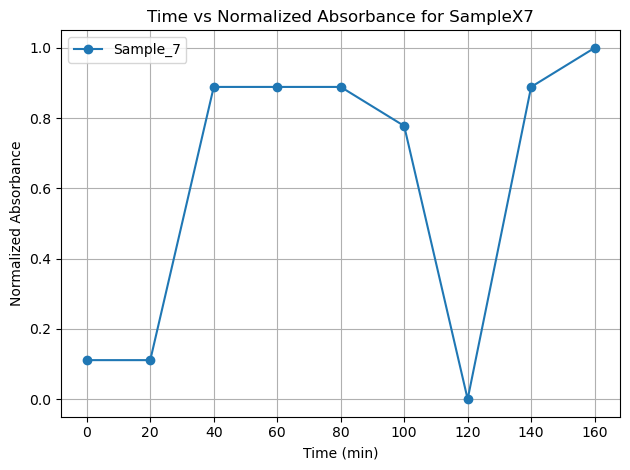

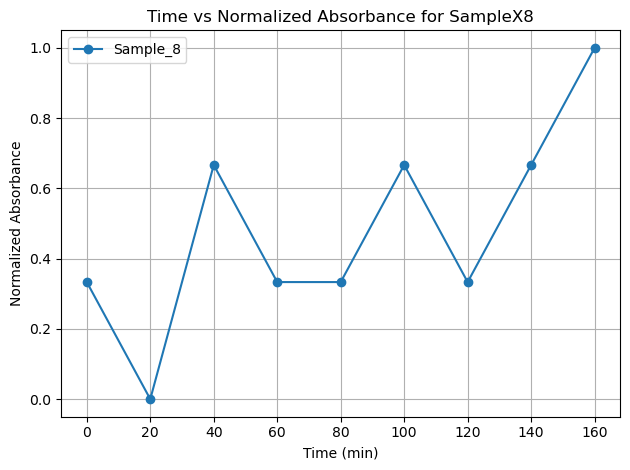

In [8]:
for i in range(8):
    I_t = []
    for j in range(9):
        row_series = dataframes[j*20].iloc[0]
        matching_columns = row_series[row_series == 450].index[0]
        absorbance_at_450 = dataframes[j*20].loc[i+1, matching_columns]
        I_t.append(absorbance_at_450)
    A_t = (I_t - min(I_t))/(max(I_t) - min(I_t))
    plt.plot(range(0, 180, 20), A_t, label=f'Sample_{i+1}', marker='o')
    plt.xlabel("Time (min)")
    plt.ylabel("Normalized Absorbance")
    plt.title(f"Time vs Normalized Absorbance for SampleX{i+1}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    

Gualtieri Model Fitting 

In [9]:
from scipy.optimize import curve_fit

C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3265294129.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3265294129.py:13: RuntimeWarning: overflow encountered in exp
  growth = 1 - np.exp(-(kg * t)**3)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3265294129.py:14: RuntimeWarning: overflow encountered in exp
  nucleation = 1 / (1 + np.exp(-(t - a) / b))
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3265294129.py:16: RuntimeWarning: invalid value encountered in multiply
  return growth * nucleation


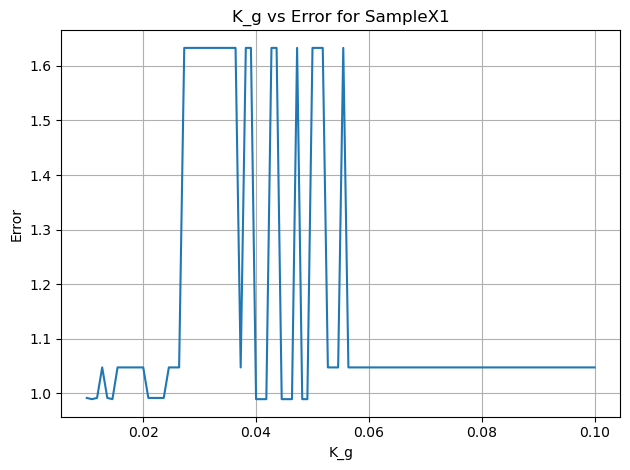

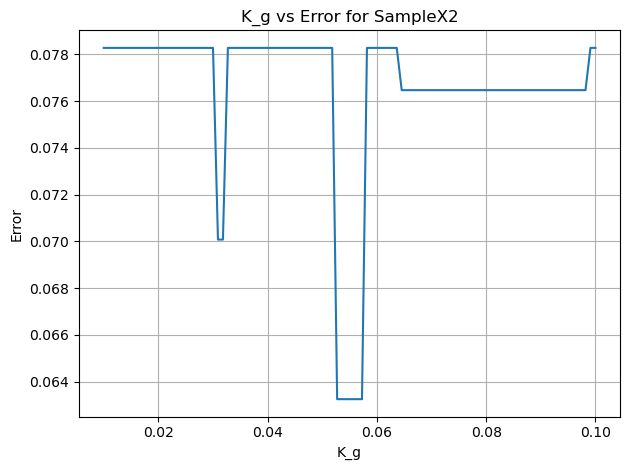

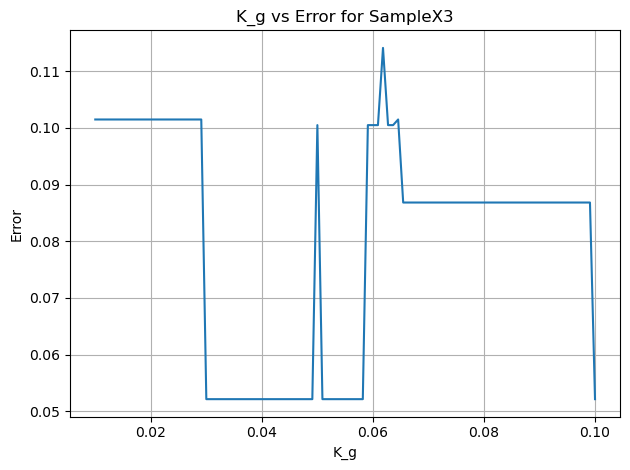

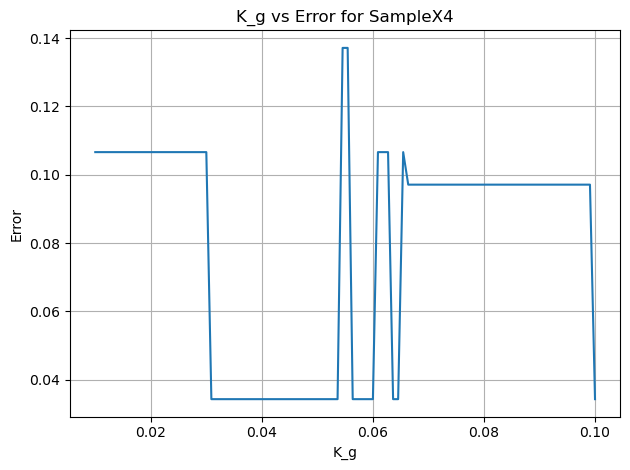

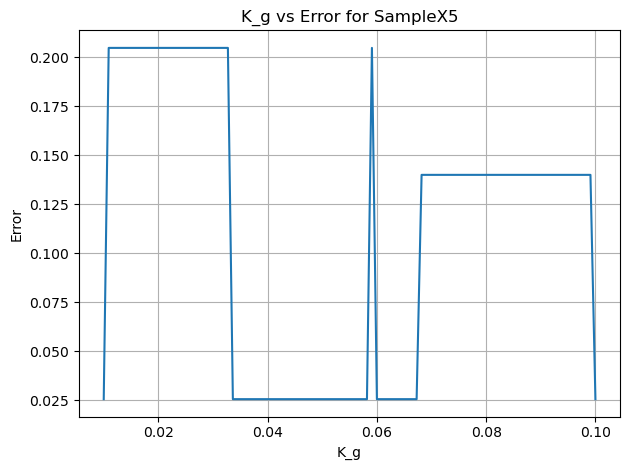

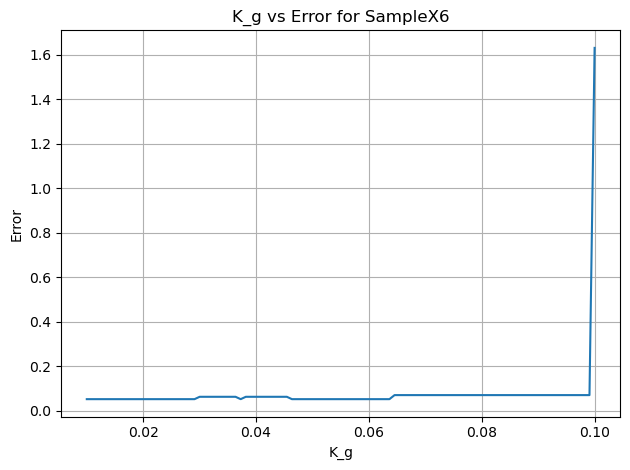

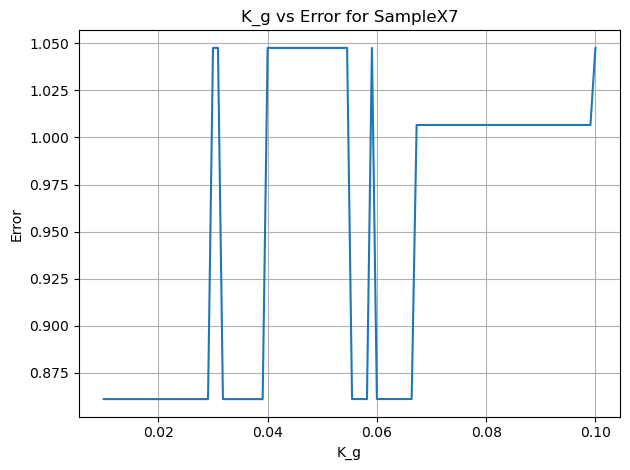

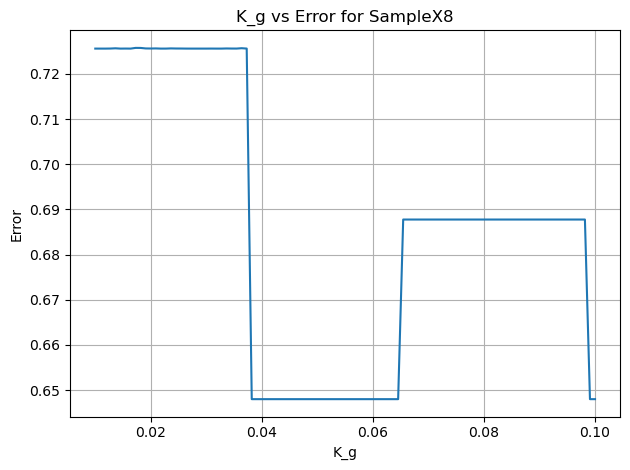

In [10]:
for i in range(1, 9): 
    sample_number = i
    I_t = []
    for j in range(9):
        row_series = dataframes[j*20].iloc[0]
        matching_columns = row_series[row_series == 450].index[0]
        absorbance_at_450 = dataframes[j*20].loc[sample_number, matching_columns]
        I_t.append(absorbance_at_450)
    alpha_data = (I_t - min(I_t))/(max(I_t) - min(I_t))
    t_data = range(0, 180, 20)

    def gualtieri_model(t, kg, a, b):
        growth = 1 - np.exp(-(kg * t)**3)
        nucleation = 1 / (1 + np.exp(-(t - a) / b))
        # print(f"Growth is: {growth}")
        return growth * nucleation

    values_to_test = np.linspace(0.01, 0.1, 100)
    errors = []
    for value in values_to_test:
        gualtieri_array = []
        p0 = [value, 1, 2]  # kg, a, b
        popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0)
        K_g = popt[0]
        a = popt[1]
        b = popt[2]
        K_n = 1/a
        for t in t_data:
            gualtieri_array.append(gualtieri_model(t, K_g, a, b))
        error = np.linalg.norm(gualtieri_array - alpha_data)
        errors.append(error)

    plt.plot(values_to_test, errors)
    plt.xlabel("K_g")
    plt.ylabel("Error")
    plt.title(f"K_g vs Error for SampleX{i}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

This code implements a grid search optimization to find the best-fitting parameters for the Gualtieri crystallization model. The algorithm explores a three-dimensional parameter space by testing 100 different values of the growth rate constant (Kg) ranging from 0.01 to 0.1, combined with 5 values each for the nucleation parameters (a and b) ranging from 1 to 5, resulting in 2,500 total parameter combinations. For each combination, the code uses scipy's `curve_fit` function to fit the Gualtieri model to the experimental time-series data. The optimization tracks the parameter set that minimizes the L2 norm error between the fitted curve and experimental data, while ensuring all parameters remain physically meaningful (positive values). The algorithm evaluates fit quality based on an error threshold of 0.1.

C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3995448320.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0, maxfev=10000)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3995448320.py:13: RuntimeWarning: overflow encountered in exp
  growth = 1 - np.exp(-(kg * t)**3)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3995448320.py:14: RuntimeWarning: overflow encountered in exp
  nucleation = 1 / (1 + np.exp(-(t - a) / b))
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3995448320.py:15: RuntimeWarning: invalid value encountered in multiply
  return growth * nucleation


K_g is 0.23812615586551072
a is 2.7642881890260442
b is 20603631464.29108
K_n is 0.3617567820786208
Error is 1.0540925535535481
Fit quality is Poor


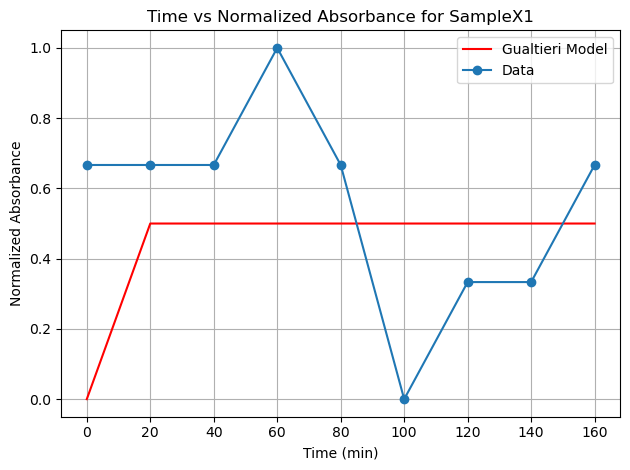

K_g is 0.00905441387092356
a is 37.67551654021986
b is 23.708068033220815
K_n is 0.026542436357374608
Error is 0.06325015978271807
Fit quality is Good


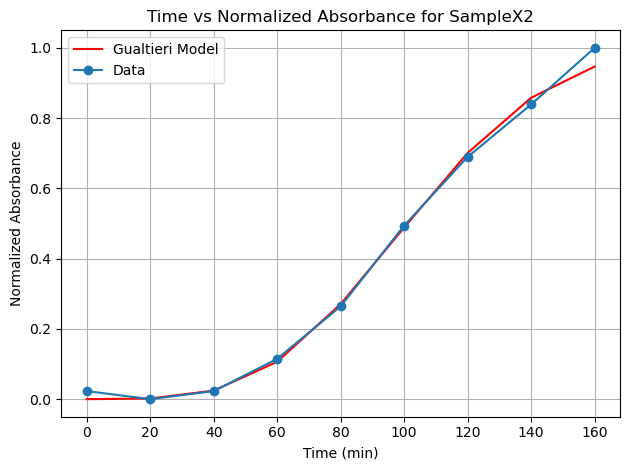

K_g is 0.025128595666155988
a is 83.41446072493031
b is 25.111112603035558
K_n is 0.011988329017646305
Error is 0.05213424996089106
Fit quality is Good


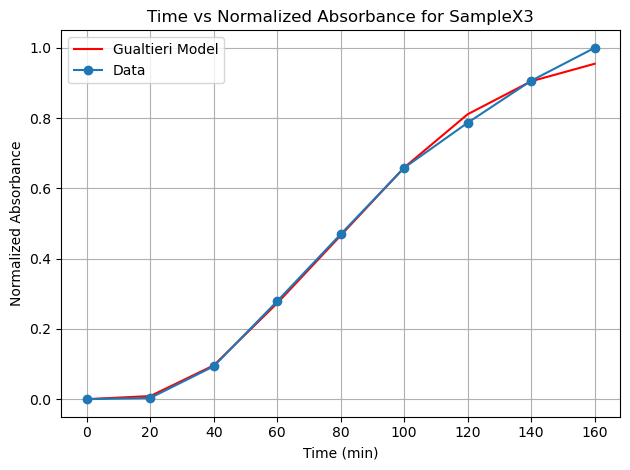

K_g is 0.025503065935778942
a is 64.02020848461484
b is 23.772692594671632
K_n is 0.015620067845301023
Error is 0.034271953125933965
Fit quality is Good


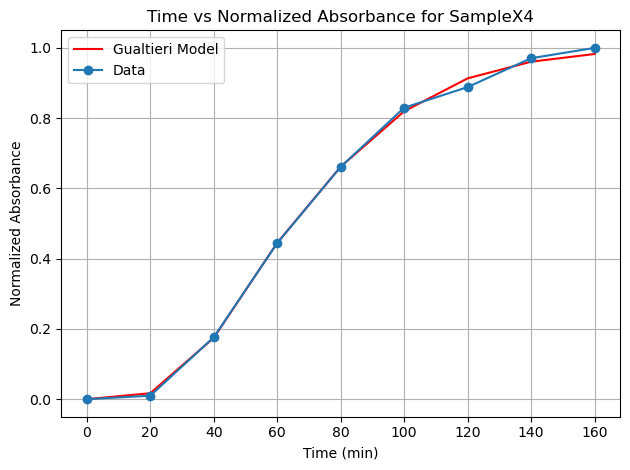

K_g is 0.032724521829618845
a is 44.836962801309475
b is 29.78828116981469
K_n is 0.02230302717941445
Error is 0.02544948970198753
Fit quality is Good


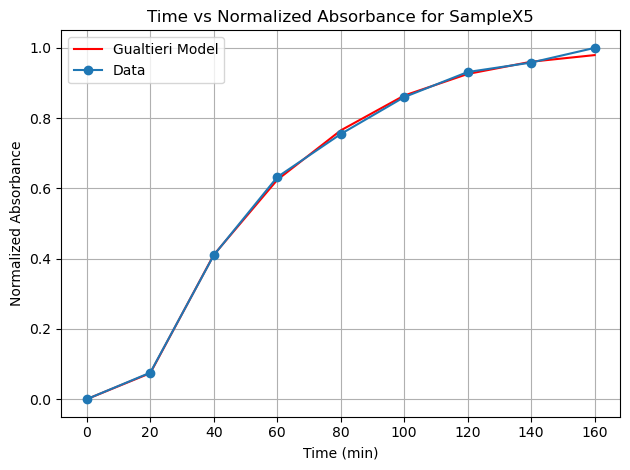

K_g is 0.009114000245257017
a is 10.927723563552656
b is 0.008783728821782244
K_n is 0.09151036756962903
Error is 0.053197334119945136
Fit quality is Good


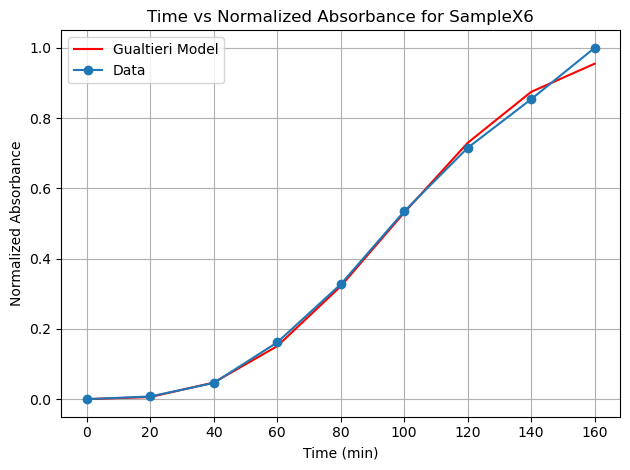

K_g is 0.1429055219157114
a is 6.822316222592967
b is 103.70433802339934
K_n is 0.1465777849300466
Error is 1.006651315380532
Fit quality is Poor


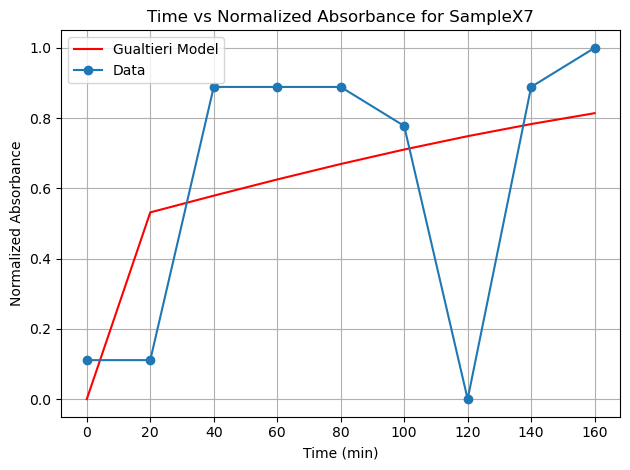

c:\Users\hardi\miniconda3\envs\axo\Lib\site-packages\scipy\optimize\_minpack_py.py:497: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


K_g is 0.03856730119602691
a is 80.62373830593303
b is 77.83664137889022
K_n is 0.012403294873346389
Error is 0.6480046310636008
Fit quality is Poor


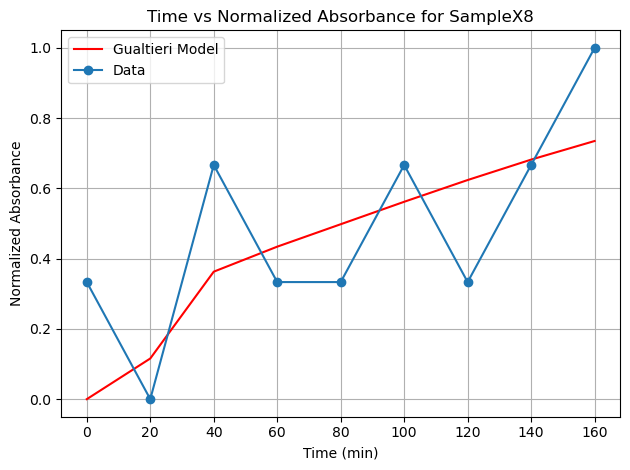

In [11]:
for i in range(1, 9): 
    I_t = []
    sample_number = i
    for j in range(9):
        row_series = dataframes[j*20].iloc[0]
        matching_columns = row_series[row_series == 450].index[0]
        absorbance_at_450 = dataframes[j*20].loc[sample_number, matching_columns]
        I_t.append(absorbance_at_450)
    alpha_data = (I_t - min(I_t))/(max(I_t) - min(I_t))
    t_data = range(0, 180, 20)

    def gualtieri_model(t, kg, a, b):
        growth = 1 - np.exp(-(kg * t)**3)
        nucleation = 1 / (1 + np.exp(-(t - a) / b))
        return growth * nucleation

    # seaching for the best initial values of Kg, a, and b
    Kg_values = np.linspace(0.01, 0.1, 100)
    a_values = np.linspace(1, 5, 5)
    b_values = np.linspace(1, 5, 5)

    best_error = np.inf
    best_params = None
    best_gualtieri_array = None

    # calculating the error for each combination of initial values and finding the value of the best parameters
    for Kg_init in Kg_values:
        for a_init in a_values:
            for b_init in b_values:
                try:
                    p0 = [Kg_init, a_init, b_init]
                    popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0, maxfev=10000)
                    K_g = popt[0]
                    a = popt[1]
                    b = popt[2]
                                        
                    gualtieri_array = [gualtieri_model(t, K_g, a, b) for t in t_data]
                    error = np.linalg.norm(np.array(gualtieri_array) - alpha_data)

                    if error < best_error and a > 0 and b > 0 and K_g > 0:
                        best_error = error
                        best_params = (K_g, a, b)
                        best_gualtieri_array = gualtieri_array

                except RuntimeError:
                    continue

    if best_params is not None:
        K_g, a, b = best_params
        K_n = 1 / a
        error = np.linalg.norm(np.array(best_gualtieri_array) - alpha_data)
    
    if error < 0.1: # value set to 0.1 by observation of the fitting 
        fit_quality = "Good"
    else:
        fit_quality = "Poor"

    print("K_g is", K_g)
    print("a is", a)
    print("b is", b)
    print("K_n is", K_n)
    print("Error is", error)
    print("Fit quality is", fit_quality)

    plt.plot(t_data, best_gualtieri_array, label='Gualtieri Model', color='red')
    plt.plot(t_data, alpha_data, label='Data', marker='o')
    plt.xlabel("Time (min)")
    plt.ylabel("Normalized Absorbance")
    plt.title(f"Time vs Normalized Absorbance for SampleX{sample_number}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Time Dependency of $K_n$ and Error

C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\389614360.py:57: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0, maxfev=10000)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\389614360.py:36: RuntimeWarning: overflow encountered in exp
  nucleation = 1 / (1 + np.exp(-(t - a) / b))
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\389614360.py:35: RuntimeWarning: overflow encountered in exp
  growth = 1 - np.exp(-(kg * t)**3)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\389614360.py:37: RuntimeWarning: invalid value encountered in multiply
  return growth * nucleation


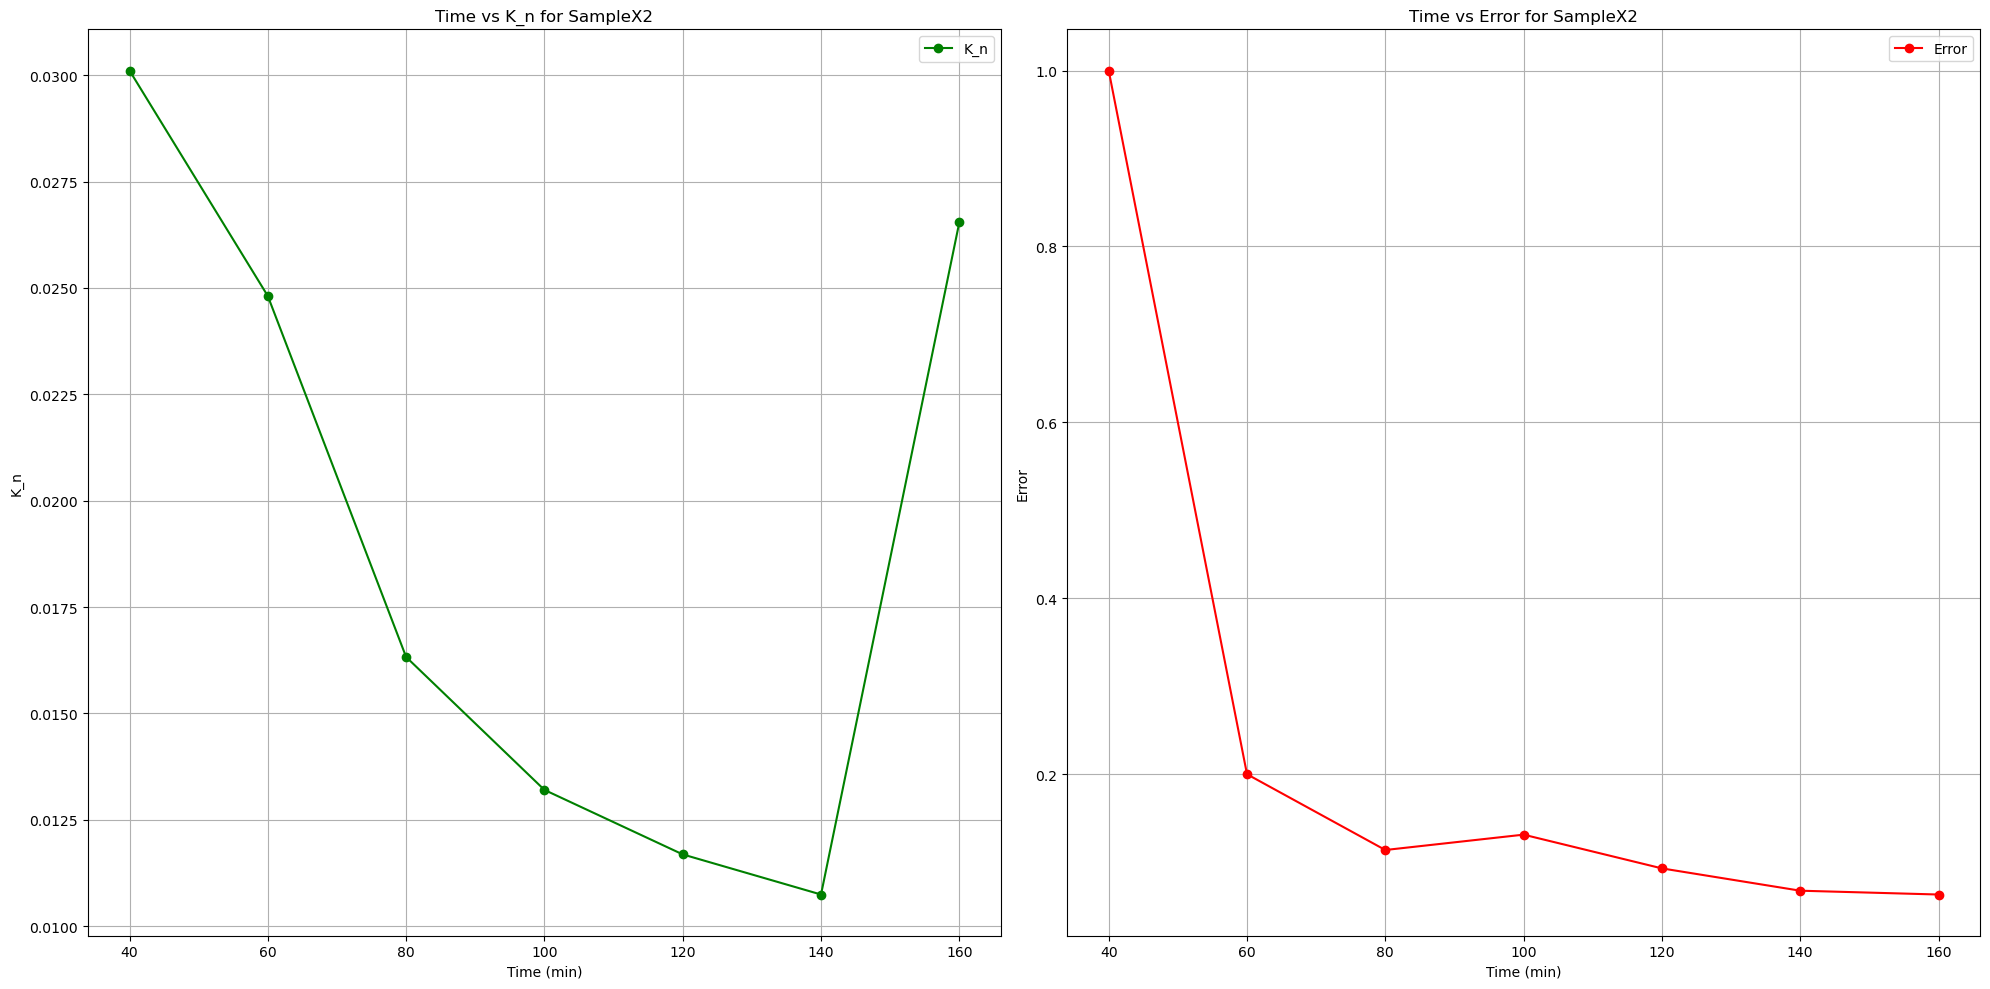

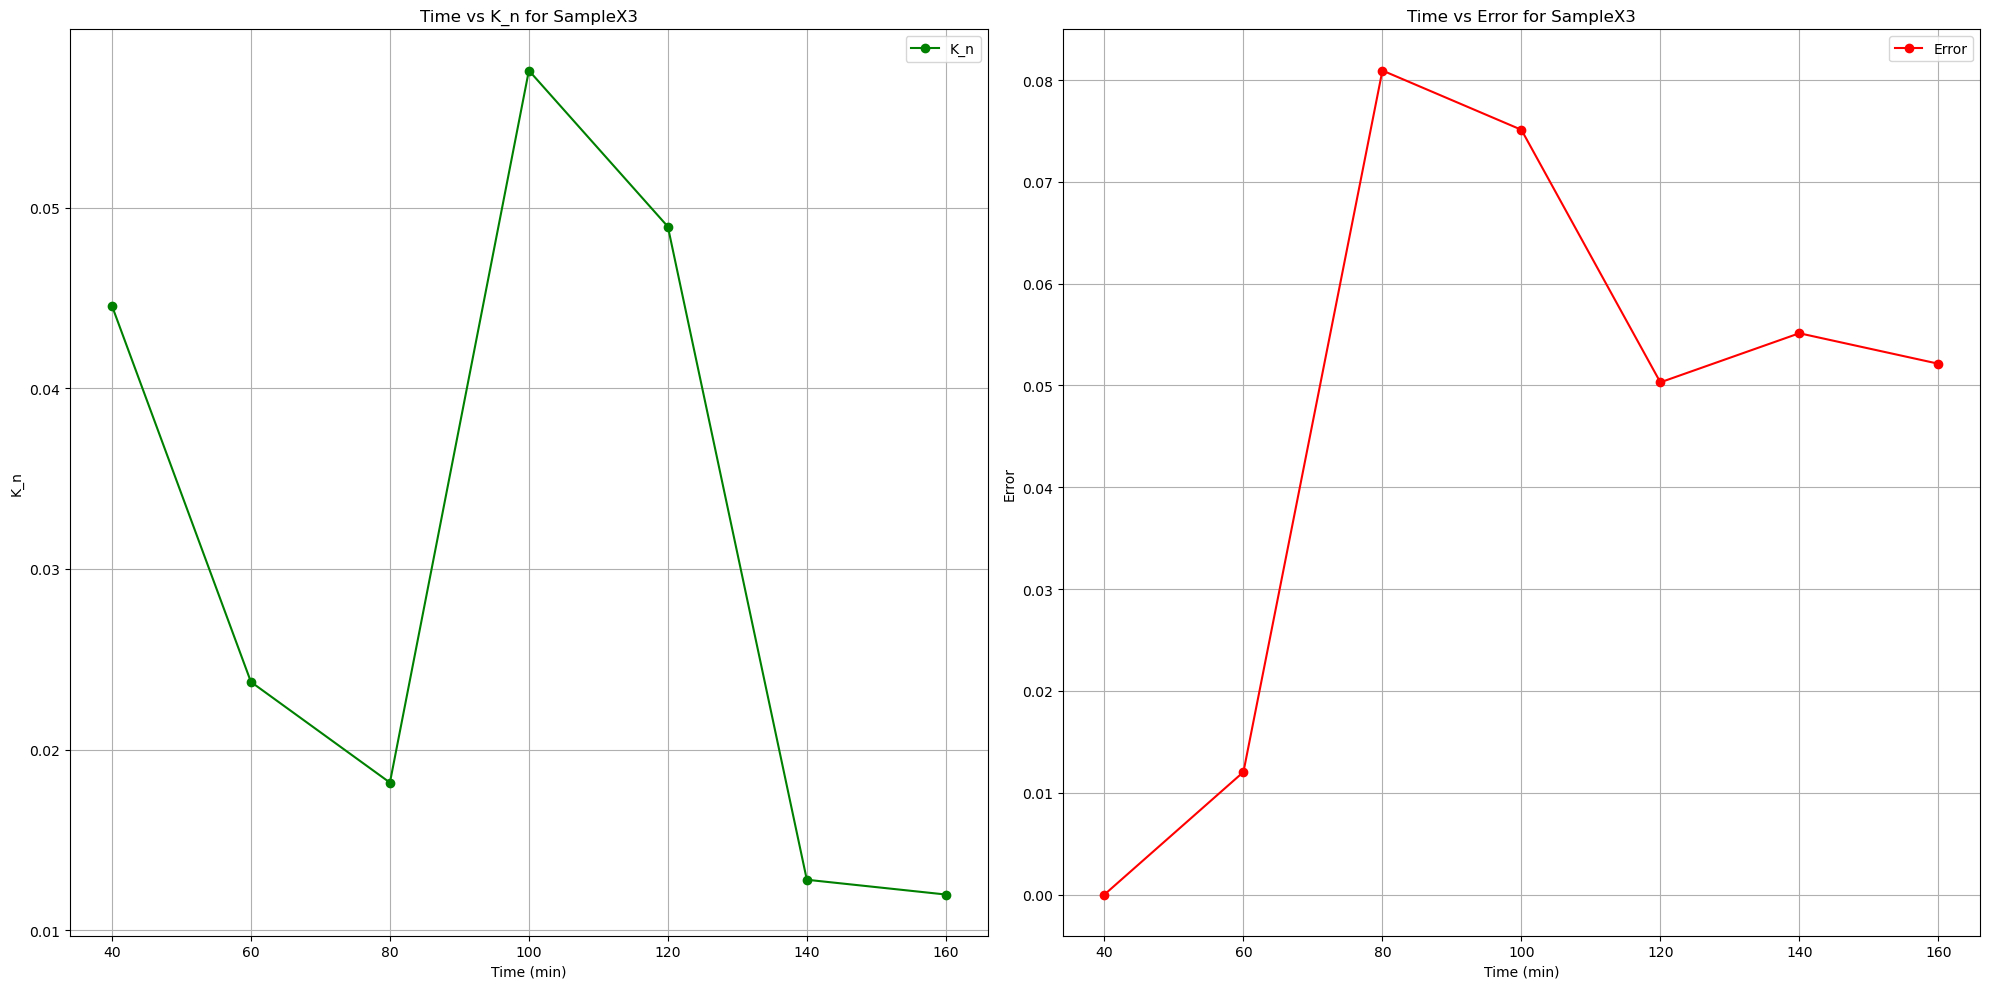

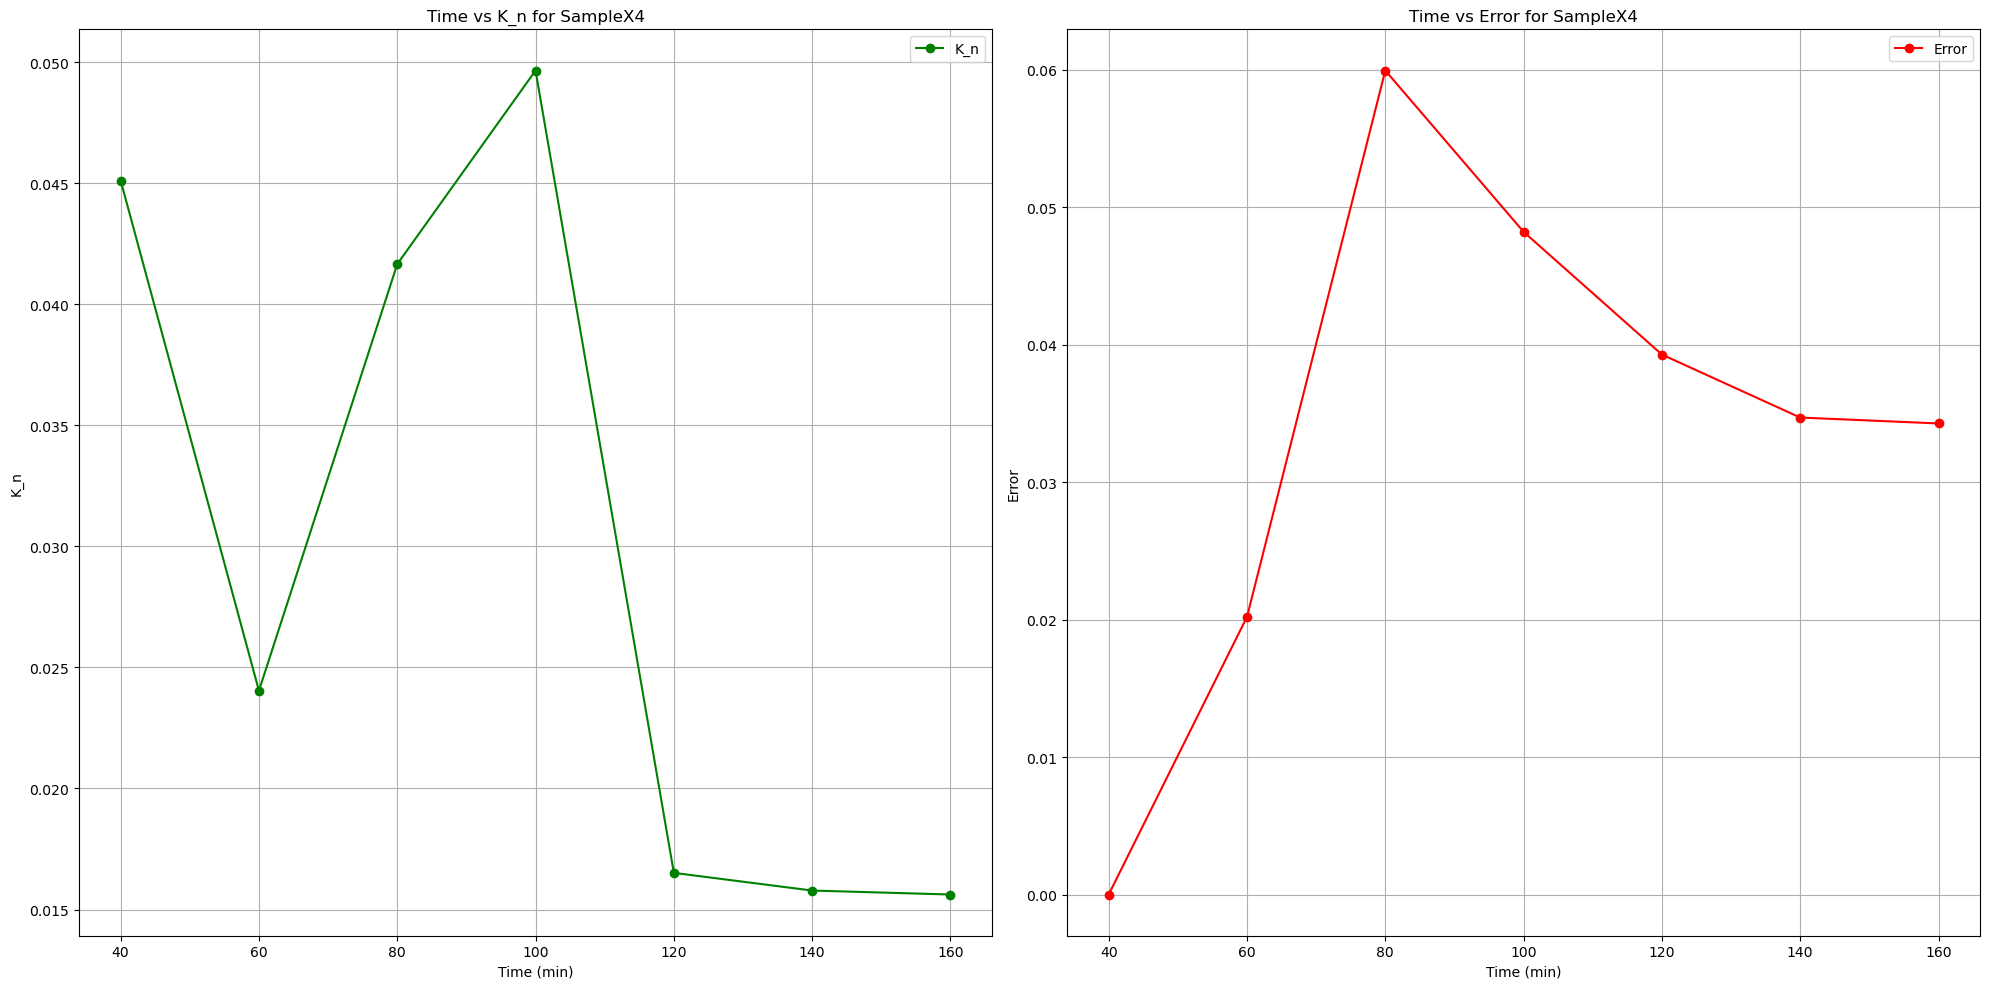

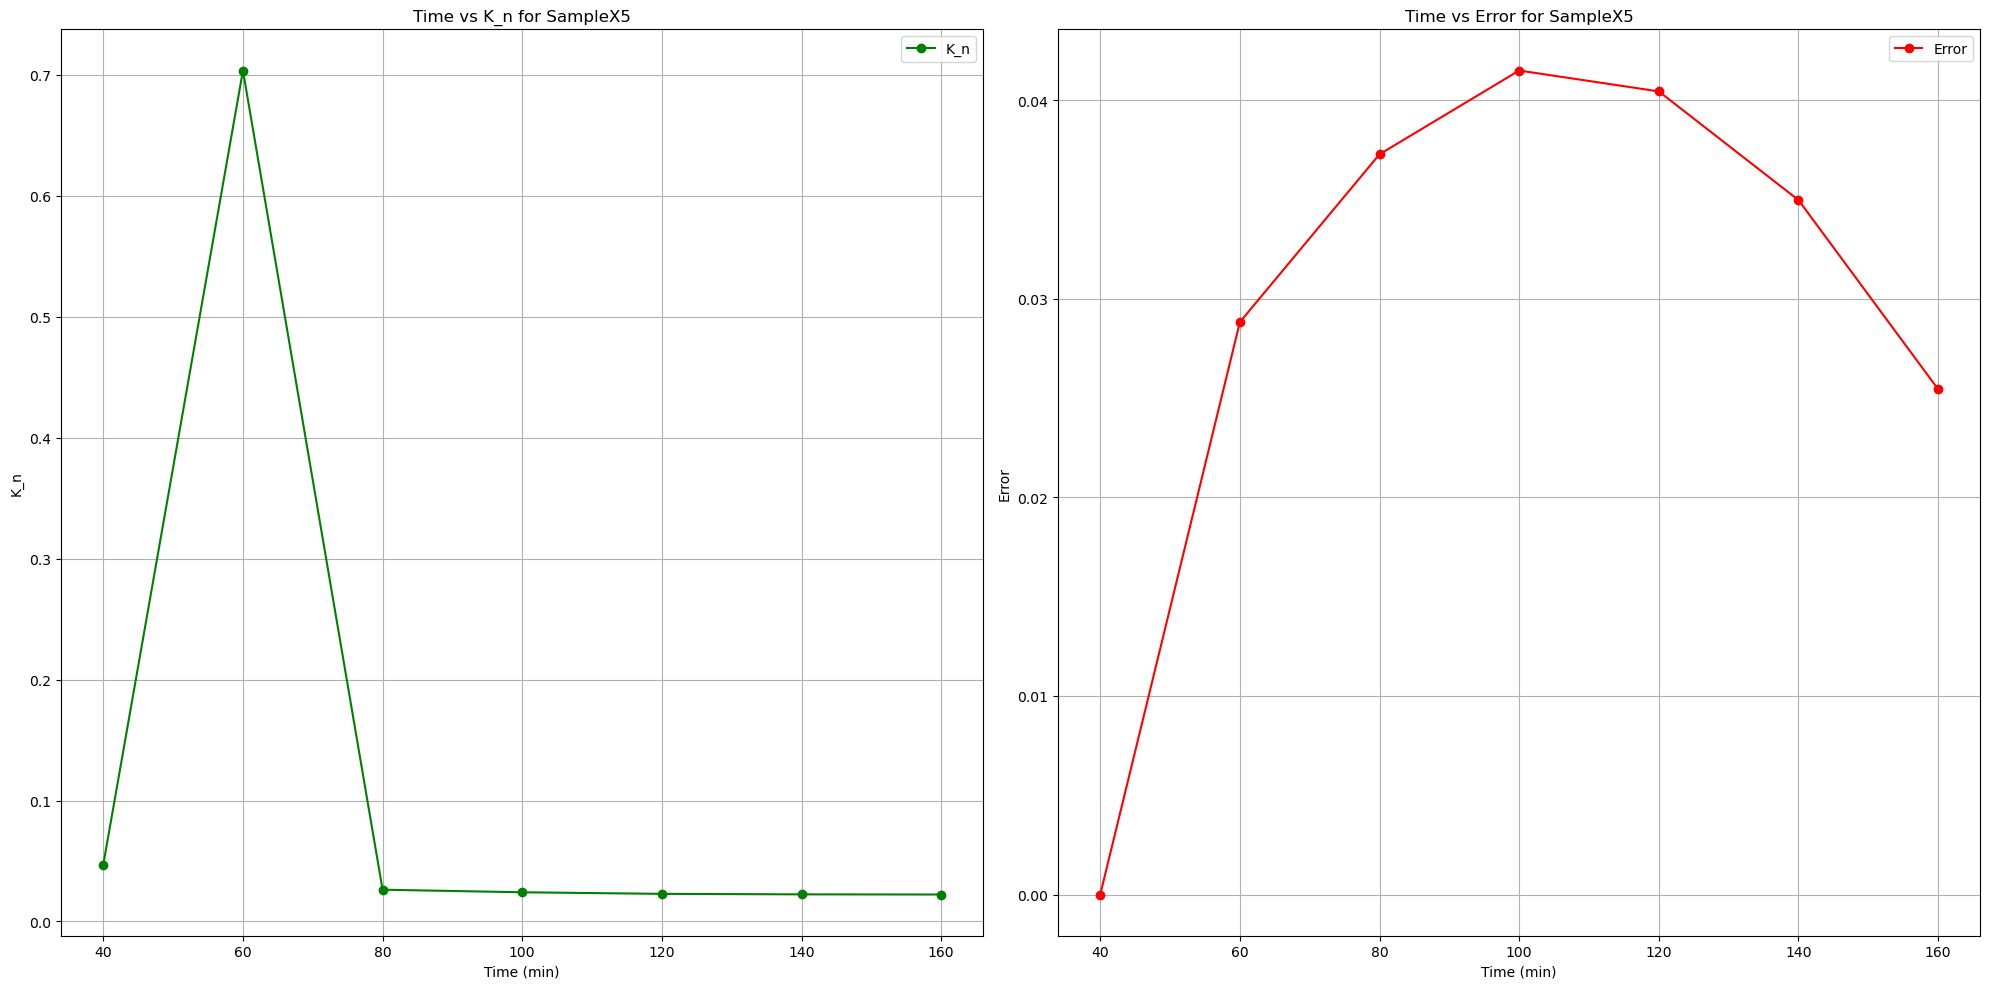

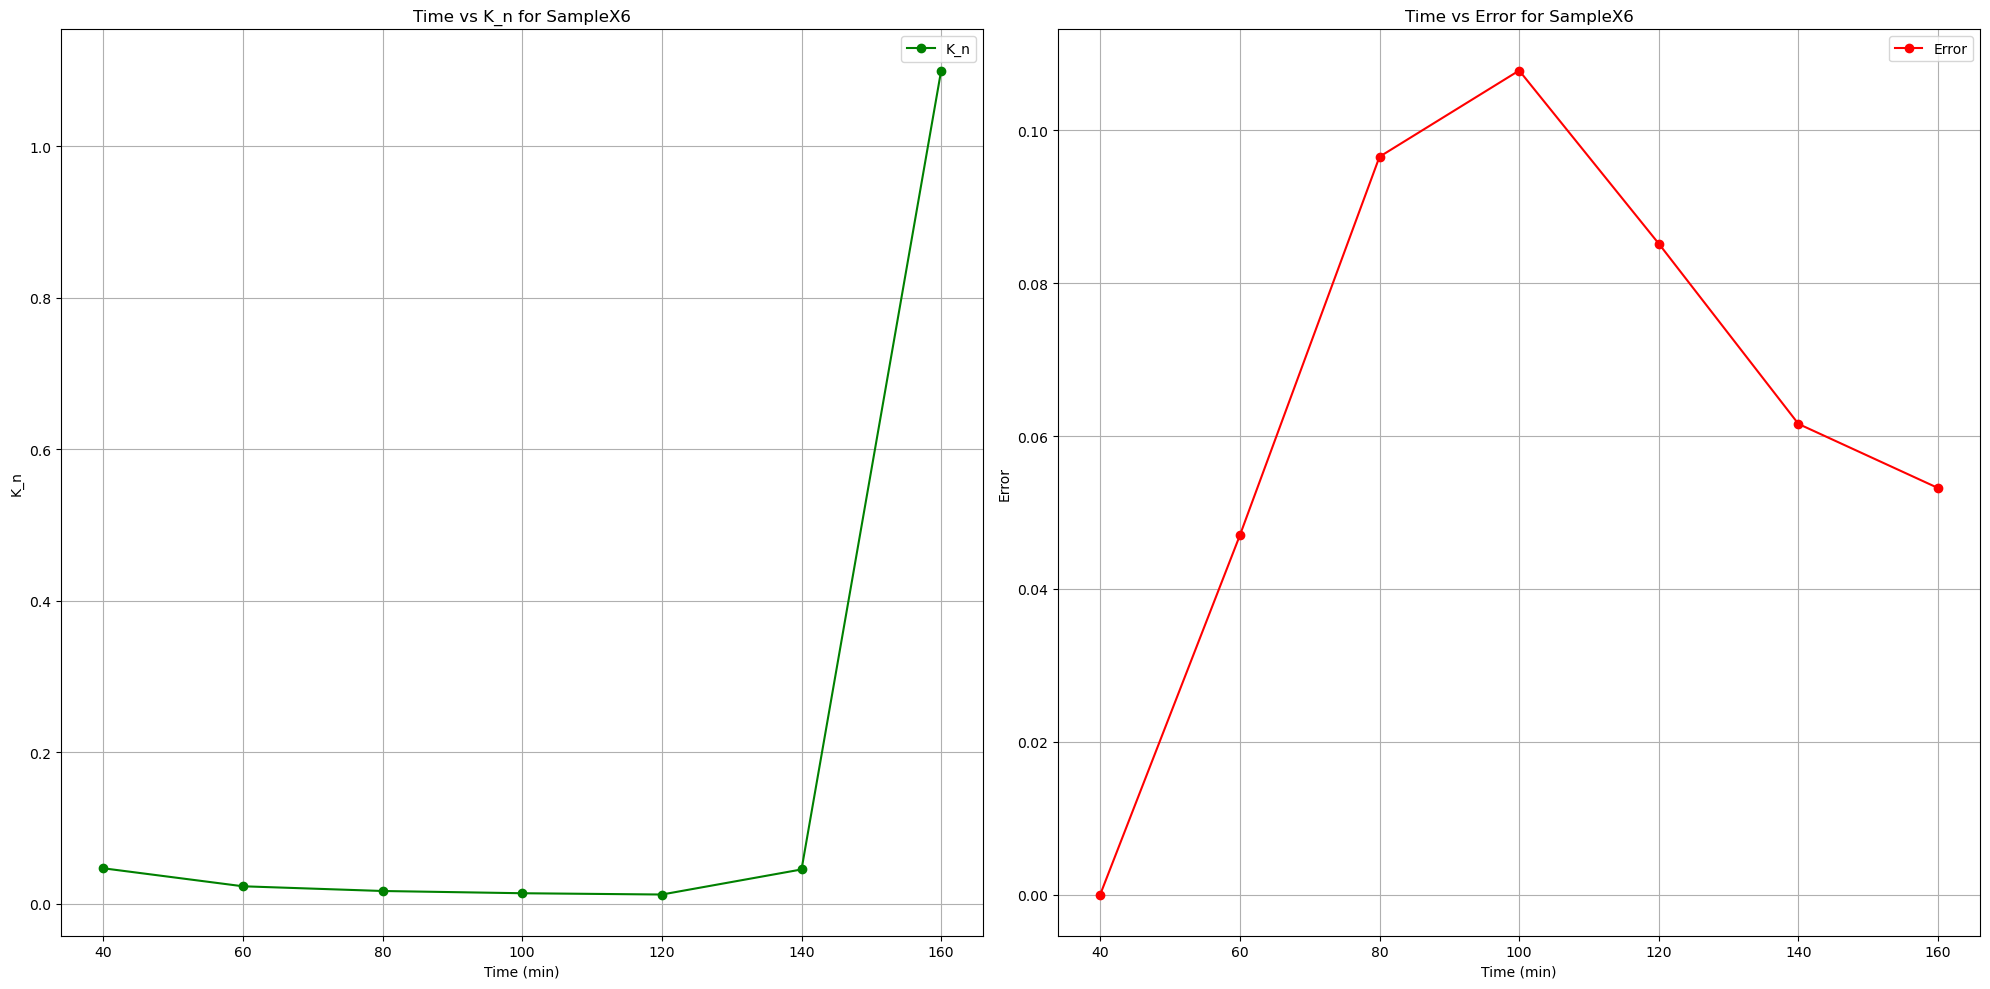

In [ ]:
for sample_number in range(2, 7):
    I_t = []
    t_data = [0, 20]
    K_n_values = []
    error_values = []

    row_series = dataframes[0].iloc[0]
    matching_columns = row_series[row_series == 450].index[0]
    absorbance_at_450 = dataframes[0].loc[sample_number, matching_columns]
    I_t.append(absorbance_at_450)

    row_series = dataframes[20].iloc[0]
    matching_columns = row_series[row_series == 450].index[0]
    absorbance_at_450 = dataframes[20].loc[sample_number, matching_columns]
    I_t.append(absorbance_at_450)
    
    # for time_point in range(0, 60, 20):
    #     row_series = dataframes[time_point].iloc[0]
    #     matching_columns = row_series[row_series == 450].index[0]
    #     absorbance_at_450 = datafram  es[time_point].loc[sample_number, matching_columns]
    #     I_t.append(absorbance_at_450)
    #     if time_point != 0:
    #         alpha_data = (I_t - min(I_t))/(max(I_t) - min(I_t))
            
    for time_point in range(40, 180, 20):
        row_series = dataframes[time_point].iloc[0]
        matching_columns = row_series[row_series == 450].index[0]
        absorbance_at_450 = dataframes[time_point].loc[sample_number, matching_columns]
        I_t.append(absorbance_at_450)
        alpha_data = (I_t - min(I_t))/(max(I_t) - min(I_t))
        t_data.append(time_point)

        def gualtieri_model(t, kg, a, b):
            growth = 1 - np.exp(-(kg * t)**3)
            nucleation = 1 / (1 + np.exp(-(t - a) / b))
            return growth * nucleation

        # seaching for the best initial values of Kg, a, and b
        Kg_values = np.linspace(0.01, 0.1, 50)
        a_values = np.linspace(1, 5, 5)
        b_values = np.linspace(1, 5, 5)

        best_error = np.inf
        best_params = None
        best_gualtieri_array = None

        # calculating the error for each combination of initial values and finding the value of the best parameters
        for Kg_init in Kg_values:
            for a_init in a_values:
                for b_init in b_values:
                    try:
                        p0 = [Kg_init, a_init, b_init]
                        # print(p0)
                        # print(t_data)
                        # print(alpha_data)
                        popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0, maxfev=10000)
                        K_g = popt[0]
                        a = popt[1]
                        b = popt[2]
                                            
                        gualtieri_array = [gualtieri_model(t, K_g, a, b) for t in t_data]
                        error = np.linalg.norm(np.array(gualtieri_array) - alpha_data)

                        if error < best_error and a > 0 and b > 0 and K_g > 0:
                            best_error = error
                            best_params = (K_g, a, b)
                            best_gualtieri_array = gualtieri_array

                    except RuntimeError:
                        continue

        if best_params is not None:
            K_g, a, b = best_params
            K_n = 1 / a
            K_n_values.append(K_n)
            error = np.linalg.norm(np.array(best_gualtieri_array) - alpha_data)
            error_values.append(error)

    #plot the K_n vs time
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(t_data[2:], K_n_values, label='K_n', marker='o', color='green')
    plt.xlabel("Time (min)")
    plt.ylabel("K_n")
    plt.title(f"Time vs K_n for SampleX{sample_number}")
    plt.grid(True)
    plt.legend()

    #plot the error vs time
    plt.subplot(1, 2, 2)
    plt.plot(t_data[2:], error_values, label='Error', marker='o', color='red')
    plt.xlabel("Time (min)")
    plt.ylabel("Error")
    plt.title(f"Time vs Error for SampleX{sample_number}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



Curve fitting for sample 2 at different times

C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3054087759.py:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0, maxfev=10000)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3054087759.py:24: RuntimeWarning: overflow encountered in exp
  nucleation = 1 / (1 + np.exp(-(t - a) / b))
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3054087759.py:23: RuntimeWarning: overflow encountered in exp
  growth = 1 - np.exp(-(kg * t)**3)
C:\Users\hardi\AppData\Local\Temp\ipykernel_24120\3054087759.py:25: RuntimeWarning: invalid value encountered in multiply
  return growth * nucleation


K_g is 0.1513945307509427
a is 21.20877137162028
b is 0.8123042870733598
K_n is 0.04715030316834441
Error is 8.981770882598994e-11


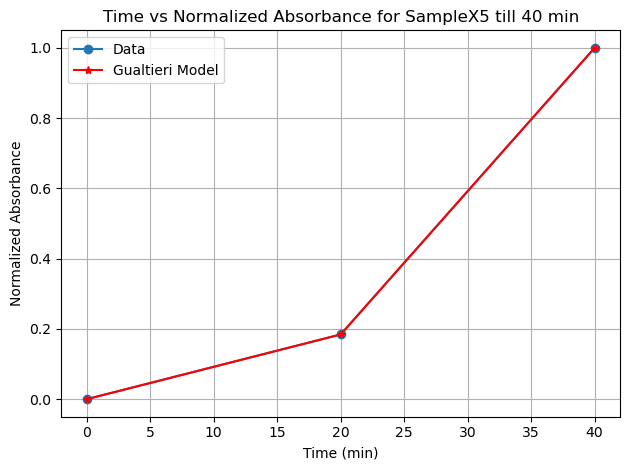

K_g is 0.02553668458274442
a is 19.019829113966136
b is 0.31522078940992027
K_n is 0.052576707919300206
Error is 0.02837496148905185


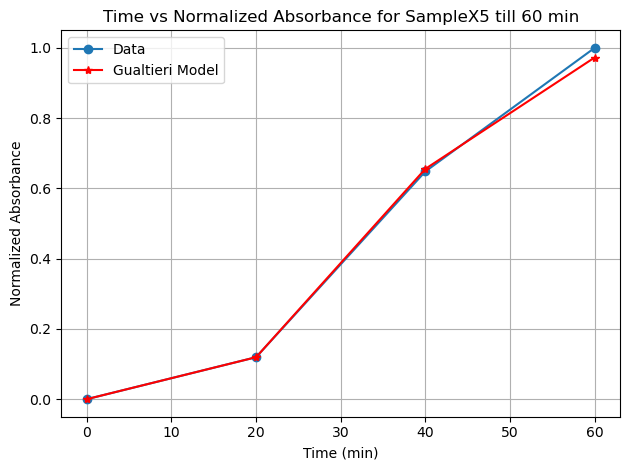

K_g is 0.045558153457106045
a is 38.03195953284268
b is 12.403299918593929
K_n is 0.026293675432012525
Error is 0.03728134741890824


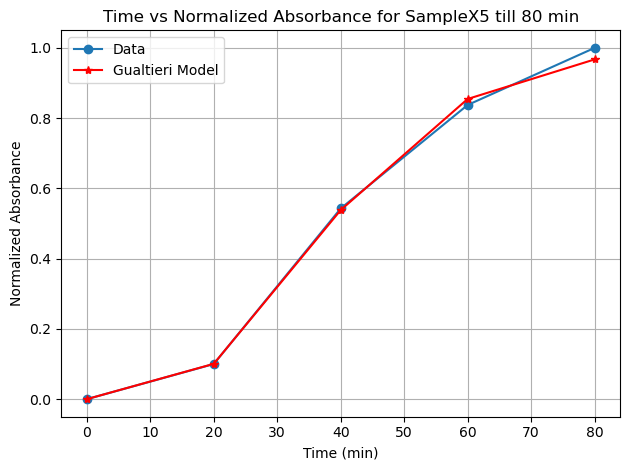

K_g is 0.03947702212964521
a is 41.38345556085785
b is 17.92902706069062
K_n is 0.024164245987854157
Error is 0.04149867473804801


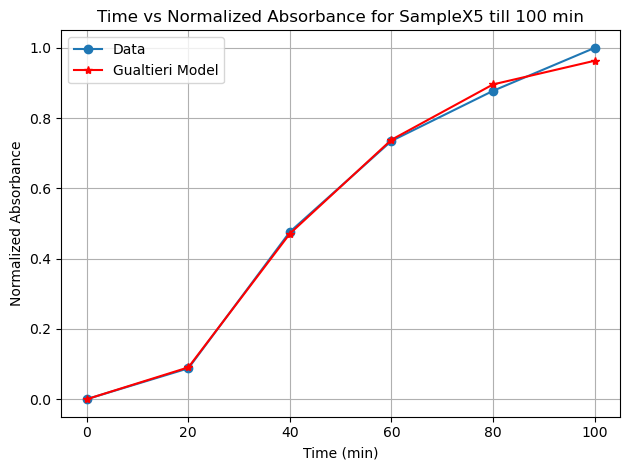

K_g is 0.03642841232911942
a is 43.76892598741434
b is 22.64735153933947
K_n is 0.02284725926991098
Error is 0.04044716798361693


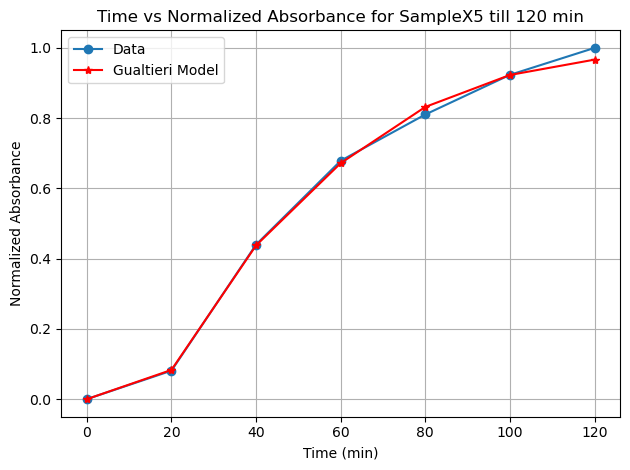

K_g is 0.03522877135481458
a is 44.56198053072461
b is 24.836551217157425
K_n is 0.022440654299701056
Error is 0.034975593214778916


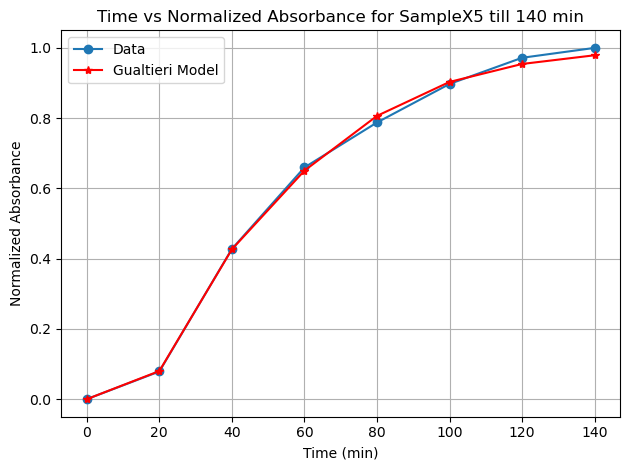

K_g is 0.032724521829618845
a is 44.836962801309475
b is 29.78828116981469
K_n is 0.02230302717941445
Error is 0.02544948970198753


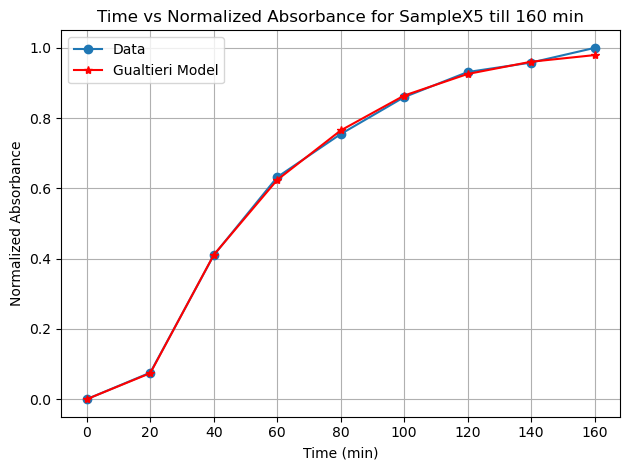

In [17]:
I_t = []
sample_number = 5

row_series = dataframes[0].iloc[0]
matching_columns = row_series[row_series == 450].index[0]
absorbance_at_450 = dataframes[0].loc[sample_number, matching_columns]
I_t.append(absorbance_at_450)

row_series = dataframes[20].iloc[0]
matching_columns = row_series[row_series == 450].index[0]
absorbance_at_450 = dataframes[20].loc[sample_number, matching_columns]
I_t.append(absorbance_at_450)

for j in range(2,9):
    row_series = dataframes[j*20].iloc[0]
    matching_columns = row_series[row_series == 450].index[0]
    absorbance_at_450 = dataframes[j*20].loc[sample_number, matching_columns]
    I_t.append(absorbance_at_450)
    alpha_data = (I_t - min(I_t))/(max(I_t) - min(I_t))
    t_data = range(0, j*20+1, 20)

    def gualtieri_model(t, kg, a, b):
        growth = 1 - np.exp(-(kg * t)**3)
        nucleation = 1 / (1 + np.exp(-(t - a) / b))
        return growth * nucleation

    # seaching for the best initial values of Kg, a, and b
    Kg_values = np.linspace(0.01, 0.1, 100)
    a_values = np.linspace(1, 5, 5)
    b_values = np.linspace(1, 5, 5)

    best_error = np.inf
    best_params = None
    best_gualtieri_array = None

    # calculating the error for each combination of initial values and finding the value of the best parameters
    for Kg_init in Kg_values:
        for a_init in a_values:
            for b_init in b_values:
                try:
                    p0 = [Kg_init, a_init, b_init]
                    popt, pcov = curve_fit(gualtieri_model, t_data, alpha_data, p0=p0, maxfev=10000)
                    K_g = popt[0]
                    a = popt[1]
                    b = popt[2]
                                        
                    gualtieri_array = [gualtieri_model(t, K_g, a, b) for t in t_data]
                    error = np.linalg.norm(np.array(gualtieri_array) - alpha_data)

                    if error < best_error and a > 0 and b > 0 and K_g > 0:
                        best_error = error
                        best_params = (K_g, a, b)
                        best_gualtieri_array = gualtieri_array

                except RuntimeError:
                    continue

    if best_params is not None:
        K_g, a, b = best_params
        K_n = 1 / a
        error = np.linalg.norm(np.array(best_gualtieri_array) - alpha_data)

    print("K_g is", K_g)
    print("a is", a)
    print("b is", b)
    print("K_n is", K_n)
    print("Error is", error)

    plt.plot(t_data, alpha_data, label='Data', marker='o')
    plt.plot(t_data, best_gualtieri_array, label='Gualtieri Model', color='red', marker='*')
    plt.xlabel("Time (min)")
    plt.ylabel("Normalized Absorbance")
    plt.title(f"Time vs Normalized Absorbance for SampleX{sample_number} till {j*20} min")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()   
